In [113]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [114]:
mtarides = np.load("MTA_Fare.npy")

In [115]:
mtarides.shape

(600, 23, 194)

In [116]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [117]:
datetime = pd.date_range(start='05/21/2010', end='02/7/2014', periods=None, freq='W')

In [118]:
datetime.shape

(194,)

In [119]:
datetime

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN')

In [120]:
ridetype.shape

(23,)

In [121]:
mtarides.shape

(600, 23, 194)

In [122]:
mtarides_new = mtarides.reshape(13800,194)

In [123]:
mtarides_new.shape

(13800, 194)

## All

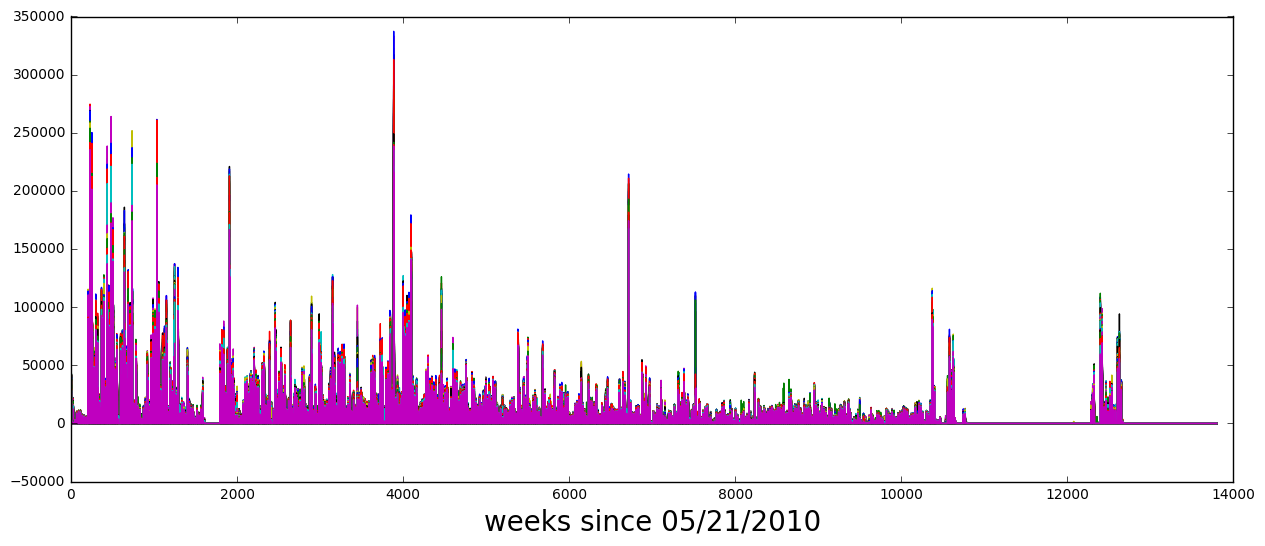

In [124]:
plt.plot(mtarides_new)
plt.xlabel("weeks since 05/21/2010", fontsize=20)
plt.legend(fontsize=15)
plt.show()


In [125]:
mta_allsum_stations = np.nansum(mtarides, axis=0)
print (mta_allsum_stations.shape)
mta_allsum_ridetype = np.nansum(mtarides, axis=1)
print (mta_allsum_ridetype.shape)

(23, 194)
(600, 194)


## Stations

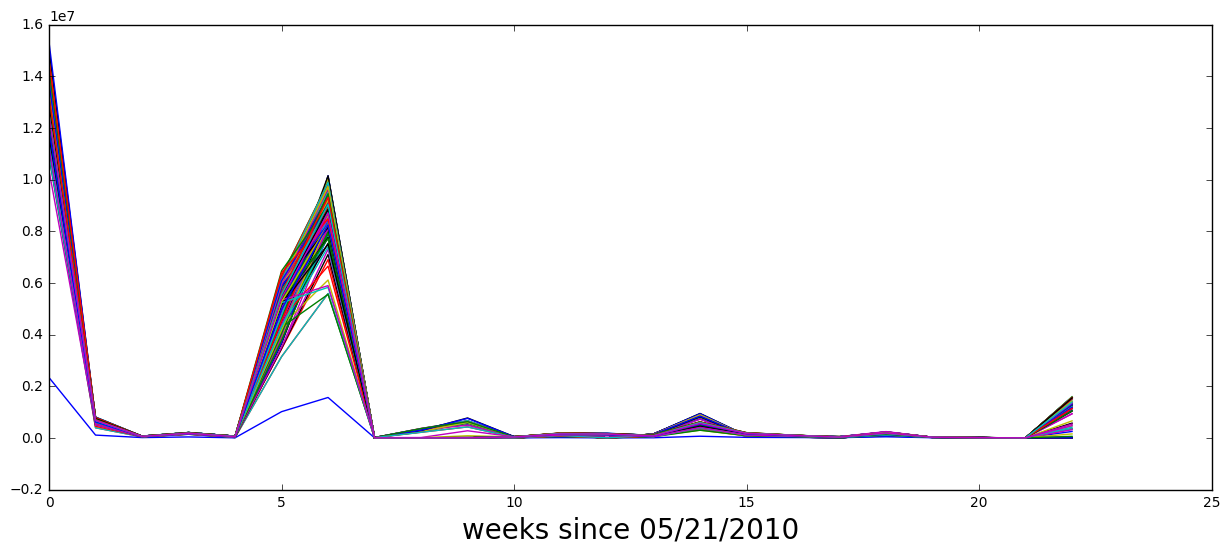

In [126]:
plt.plot(mta_allsum_stations)
plt.xlabel("weeks since 05/21/2010", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [143]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(mta_allsum_ridetype):
    rolmean_stations = pd.rolling_mean(mta_allsum_stations, window=12)
    rolstd_stations = pd.rolling_std(mta_allsum_stations, window=12)

    orig_stations = plt.plot(mta_allsum_stations, color='blue', label='Original')
    mean = plt.plot(rolmean_stations, color='red', label='Rolling Mean')
    std = plt.plot(rolstd_stations, color='black', label = 'Rolling Std')
    plt.legend
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


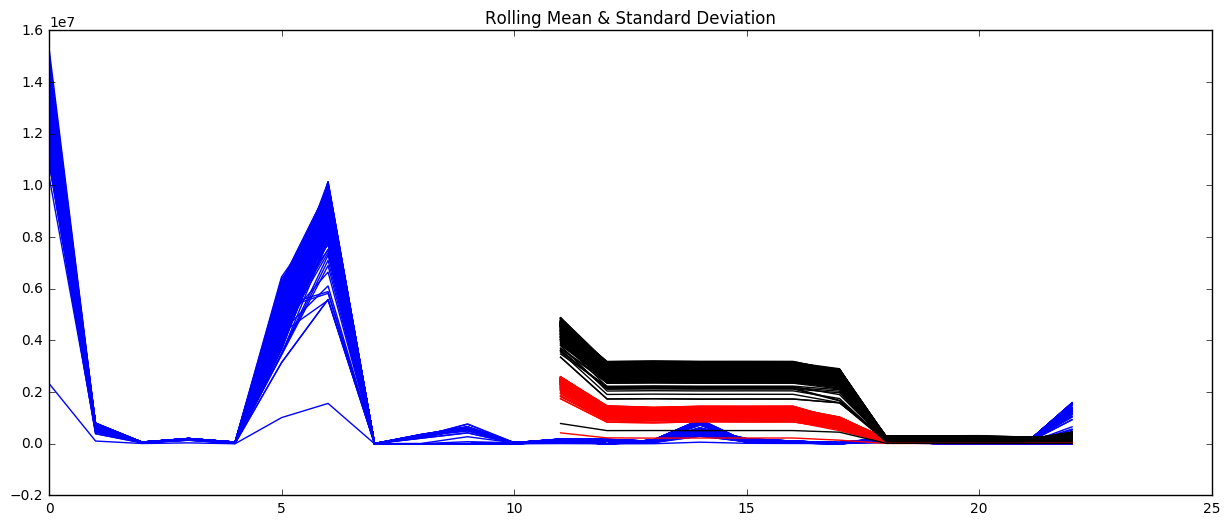

In [144]:
test_stationarity(mta_allsum_stations)

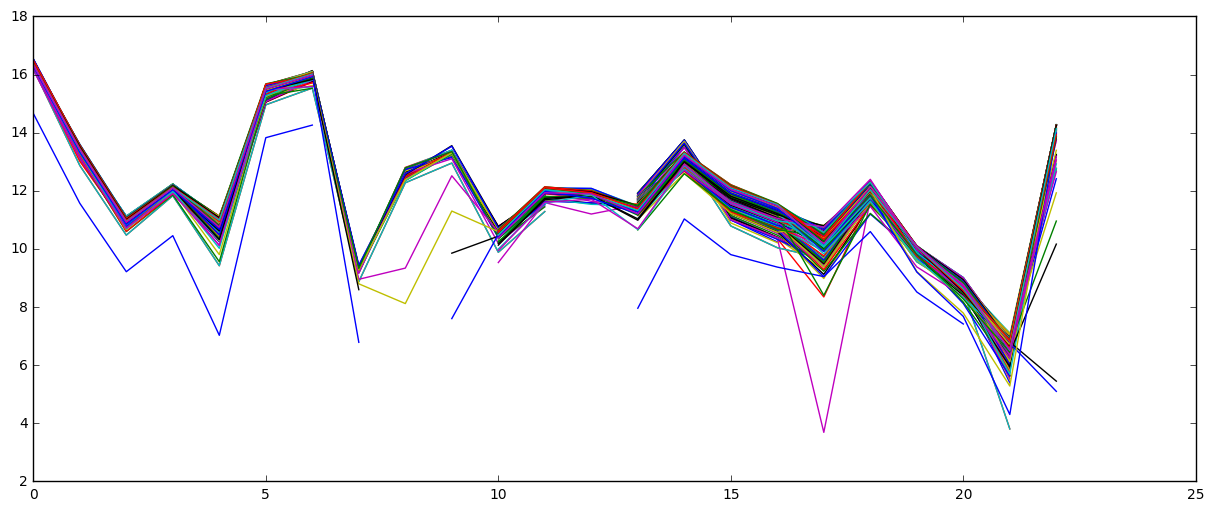

In [145]:
stations_log = np.log(mta_allsum_stations)
plt.plot(stations_log)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


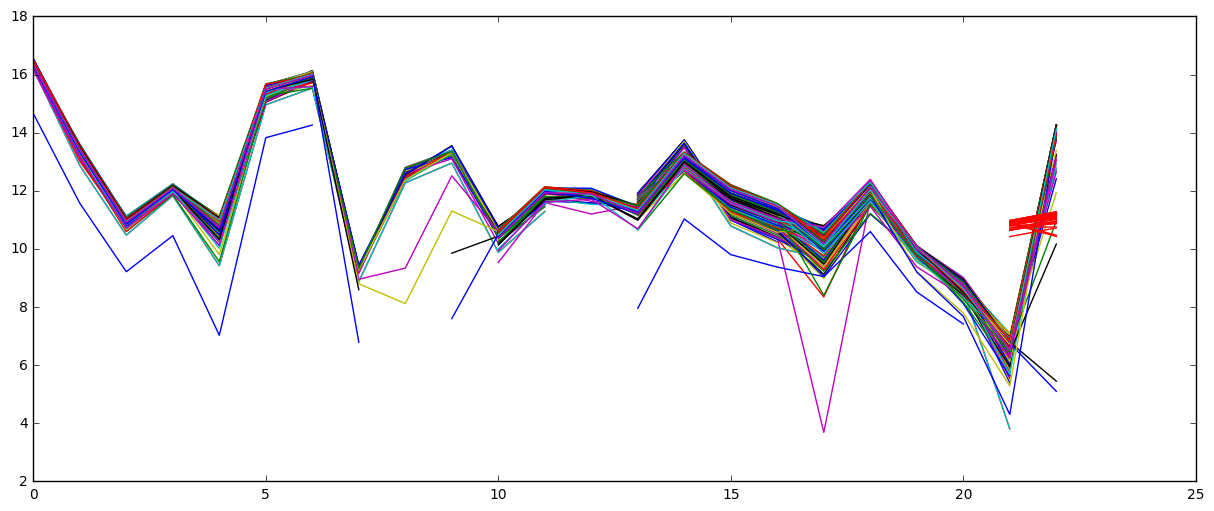

In [146]:
moving_avg = pd.rolling_mean(stations_log,12)
plt.plot(stations_log)
plt.plot(moving_avg, color='red')

## Ridetype

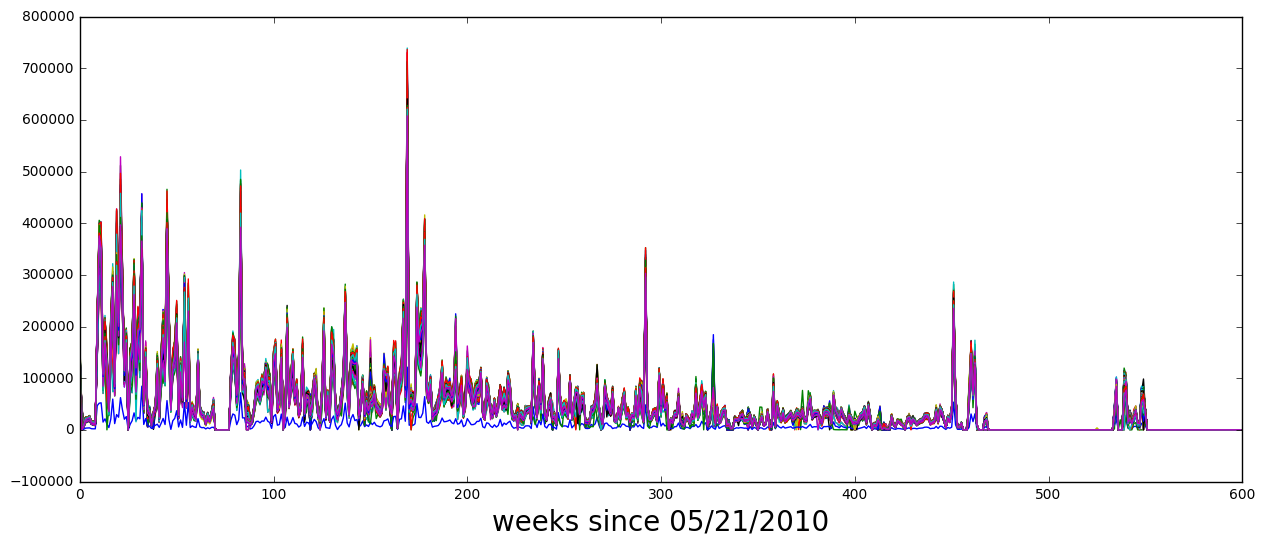

In [127]:
plt.plot(mta_allsum_ridetype)
plt.xlabel("weeks since 05/21/2010", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [138]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(mta_allsum_ridetype):
    
    rolmean = pd.rolling_mean(mta_allsum_ridetype, window=12)
    rolstd = pd.rolling_std(mta_allsum_ridetype, window=12)

    orig = plt.plot(mta_allsum_ridetype, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


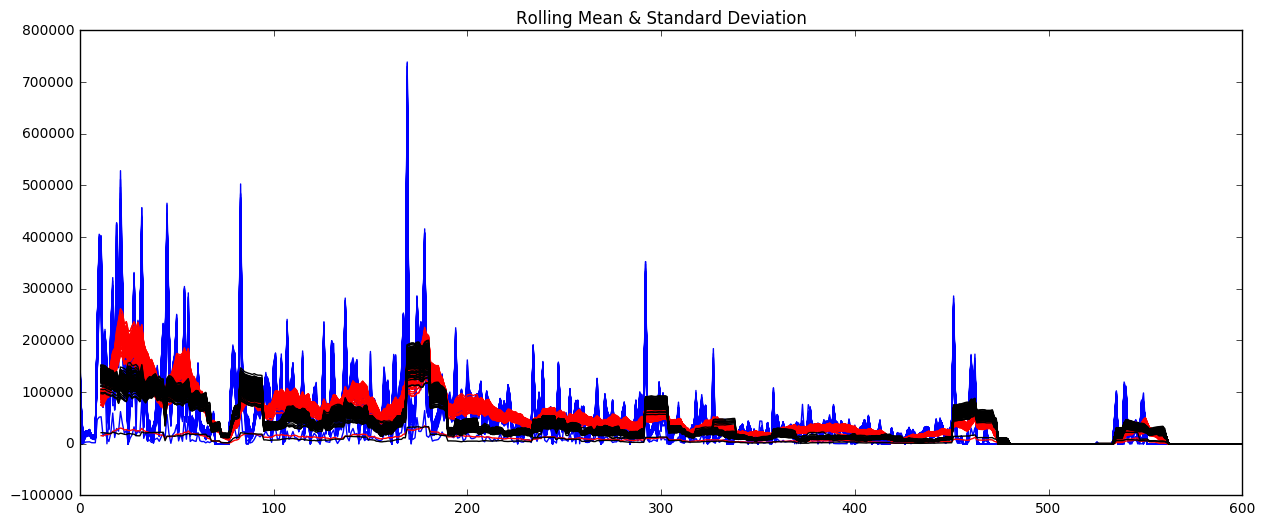

In [139]:
test_stationarity(mta_allsum_ridetype)

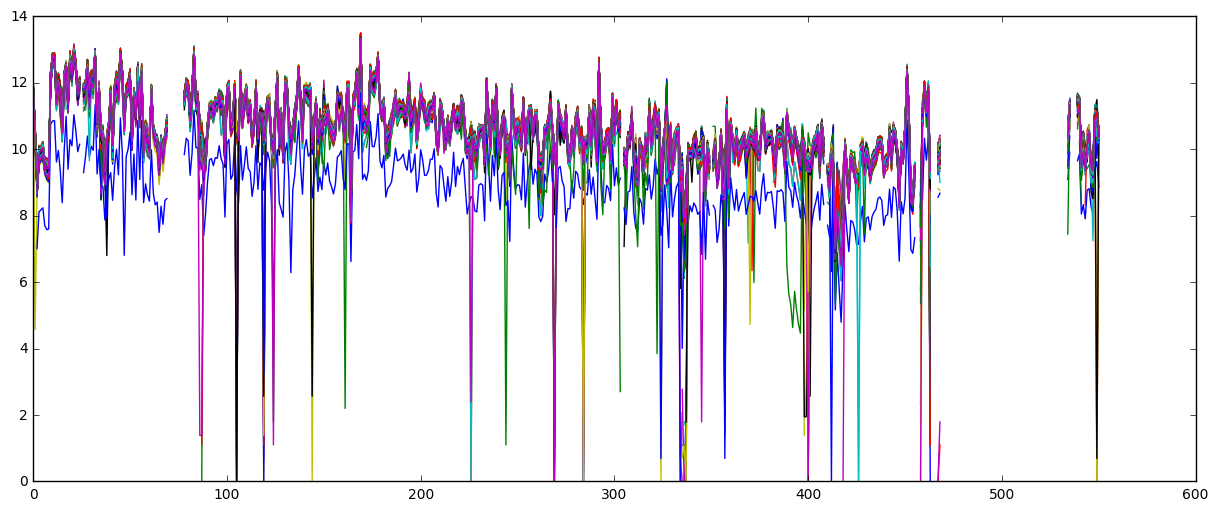

In [140]:
ts_log = np.log(mta_allsum_ridetype)
plt.plot(ts_log)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


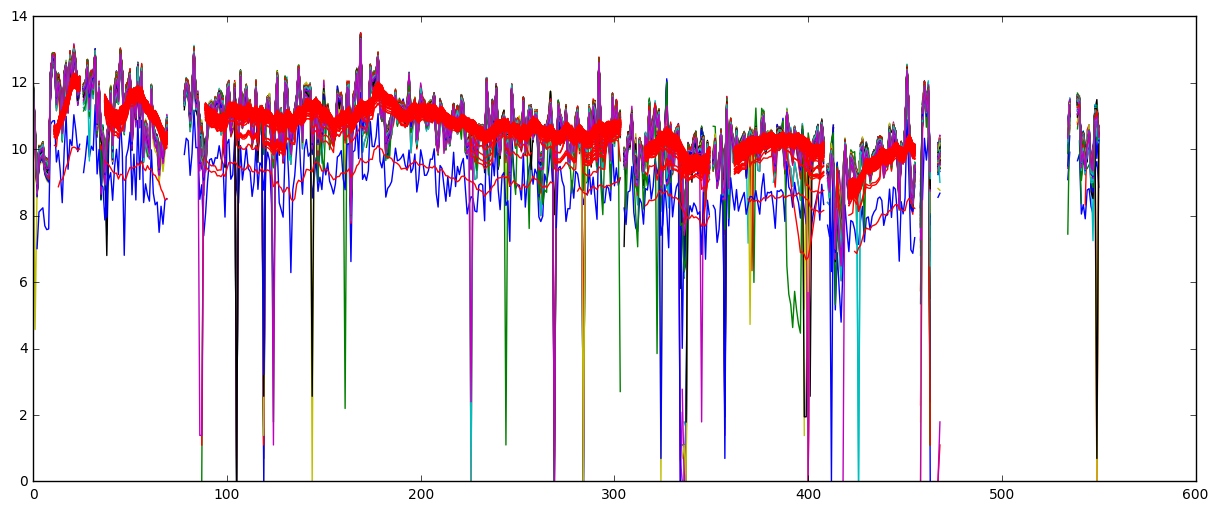

In [141]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')